In [1]:
import sys
sys.path.append("..")

import helper.helper as h
import helper.methods as m

import numpy as np
import matplotlib.pyplot as plt

[[ 0.63426655  0.          0.          0.          0.        ]
 [-0.55425101  0.66580153  0.          0.          0.        ]
 [ 0.          0.          0.71667324  0.          0.        ]
 [ 0.          0.          0.          0.72949842  0.        ]
 [ 0.          0.96750896 -0.93208327  0.          0.60153569]]


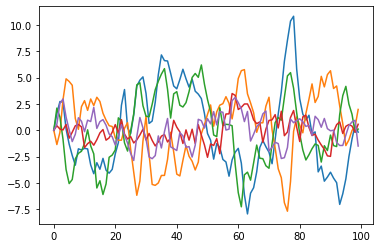

In [2]:
p, s, T = 5, 5, 100
A = h.generate_A(p, s, low = 0.5, high = 1.0)

for i in range(p):
    A[i][i] = np.random.uniform(0.5, 0.75)
    
X = h.generate_var_2(T, p, A, np.identity(p))
plt.plot(X)
print(A)

In [3]:
W_OLS = m._OLS(X)
W_OLS[np.abs(W_OLS) < 0.20] = 0

# re estimate using the support of W
print(W_OLS)
print(round(expected_excess_cost_var(A, W_OLS), 3))
W_OLS = supp_OLS(X, W_OLS != 0)
print(W_OLS)
print(round(expected_excess_cost_var(A, W_OLS), 3))

[[ 0.63150715  0.          0.          0.          0.        ]
 [-0.5532998   0.69784786  0.          0.          0.        ]
 [ 0.          0.          0.75906812  0.          0.        ]
 [ 0.          0.          0.          0.64717922  0.        ]
 [ 0.          1.03520302 -0.8409918   0.          0.6641435 ]]


NameError: name 'expected_excess_cost_var' is not defined

In [ ]:
W, res = m._K_OMP(X[:-1], X[1:], normalize = True, is_sem = False, F = [], tol = T / 50)
print(W)
round(expected_excess_cost_var(A, W), 3)

In [ ]:
W, h_val = m._notears_2(X, lambda1 = 0.2)
print(W)

print(round(expected_excess_cost_var(A, W), 3))
# re estimate using the support of W
W = supp_OLS(X, W != 0)
print(round(expected_excess_cost_var(A, W), 3))

In [ ]:
W, _ = m._LASSO_LINGNAM(X, step_size = 0.0001, normalize = True)
print(W)

print(round(expected_excess_cost_var(A, W), 3))
# re estimate using the support of W
W = supp_OLS(X, W != 0)
print(round(expected_excess_cost_var(A, W), 3))

In [ ]:
W, _ = m._OLS_LINGNAM(X)
print(W)
print(round(expected_excess_cost_var(A, W), 3))
# re estimate using the support of W
W = supp_OLS(X, W != 0)
print(round(expected_excess_cost_var(A, W), 3))

In [ ]:
covariance_X = np.matmul(np.linalg.inv(np.identity(p ** 2) - np.kron(A.T, A.T)), np.identity(p).reshape(p ** 2)).reshape((p, p))

def expected_excess_cost_var(W_true, W_est, Sigma = np.identity(p)):
    
    # base on the distribution of X, no actual data needed.    
    # covariance_X = np.matmul(np.linalg.inv(np.identity(p ** 2) - np.kron(W_true.T, W_true.T)), Sigma.reshape(p ** 2)).reshape((p, p))
    
    # covariance matrix
    covariance_matrix = Sigma + np.matmul((W_true - W_est).T, np.matmul(covariance_X.T, (W_true - W_est)))
    
    # return expected MSE
    return np.trace(covariance_matrix) - len(W_true)

In [ ]:
np.random.seed(seed = 123)

round(expected_excess_cost_var(A, W), 3)

In [ ]:
def supp_OLS(X, supp):
    """
       Performs OLS on the data X
       The output will NOT be a DAG necessarily.
    """

    # get dimensions
    _,  n = np.shape(X)

    # initialize OLS matrix
    W_OLS = np.zeros((n, n))
    
    # get per column
    for i in range(n):
        indx = supp[:, i]
        
        X_F = X[:-1, indx]
        
        # closed form solution per OLS
        W_OLS[indx, i] = (np.linalg.inv(X_F.T @ X_F) @ X_F.T) @ X[1:, i]
        
    # return OLS solution
    return W_OLS

supp_OLS(X, W_OLS != 0)

In [11]:
def x_n(n):
    if n == 1:
        return 1
    else:
        return sum([x_n(n - k) for k in range(1, n)]) + 1
    
print([x_n(k) for k in range(10)])

[1, 1, 2, 4, 8, 16, 32, 64, 128, 256]


In [8]:
x_vals = np.zeros(10)
x_vals[1] = 1
for n in range(1, 10):
    x_vals[n] = sum(x_vals[n - k] for k in range(1, n)) + 1
    print(x_vals)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 2. 4. 0. 0. 0. 0. 0. 0.]
[0. 1. 2. 4. 8. 0. 0. 0. 0. 0.]
[ 0.  1.  2.  4.  8. 16.  0.  0.  0.  0.]
[ 0.  1.  2.  4.  8. 16. 32.  0.  0.  0.]
[ 0.  1.  2.  4.  8. 16. 32. 64.  0.  0.]
[  0.   1.   2.   4.   8.  16.  32.  64. 128.   0.]
[  0.   1.   2.   4.   8.  16.  32.  64. 128. 256.]
